In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
data = pd.read_csv("data/loan_data.csv")

## Basic Info

In [144]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [146]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## Null Values

In [147]:
data.isnull().any()

person_age                        False
person_gender                     False
person_education                  False
person_income                     False
person_emp_exp                    False
person_home_ownership             False
loan_amnt                         False
loan_intent                       False
loan_int_rate                     False
loan_percent_income               False
cb_person_cred_hist_length        False
credit_score                      False
previous_loan_defaults_on_file    False
loan_status                       False
dtype: bool

In [148]:
data.nunique()

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

In [149]:
cat_cols = [col for col in data.columns if data[col].nunique() < 10]
cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file',
 'loan_status']

## Countplots

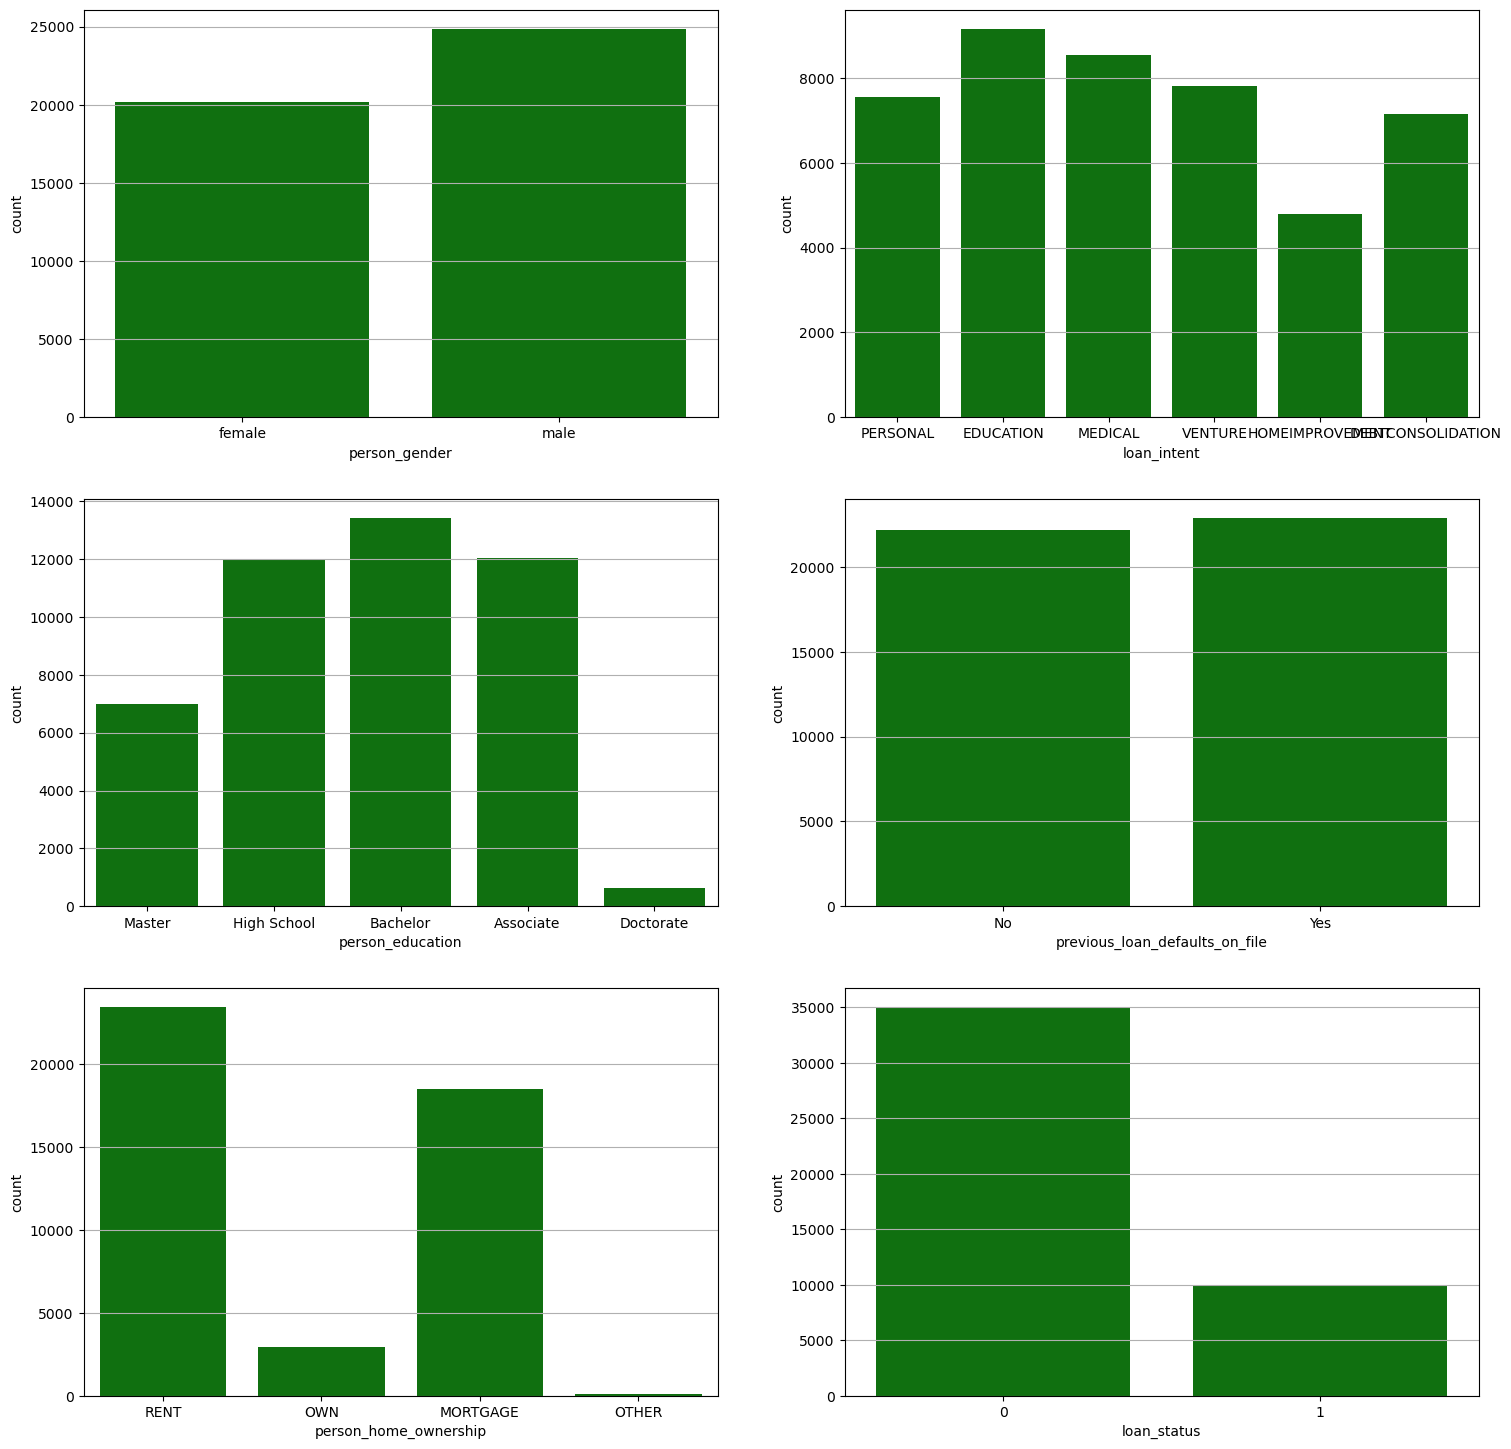

In [150]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(18,18))
for i,col in enumerate(cat_cols):
    column = i // 3
    row = i % 3
    axes[row][column].grid()
    sns.countplot(data, x=col, ax=axes[row][column], color="green")
fig.savefig("CountplotCategorical.png")

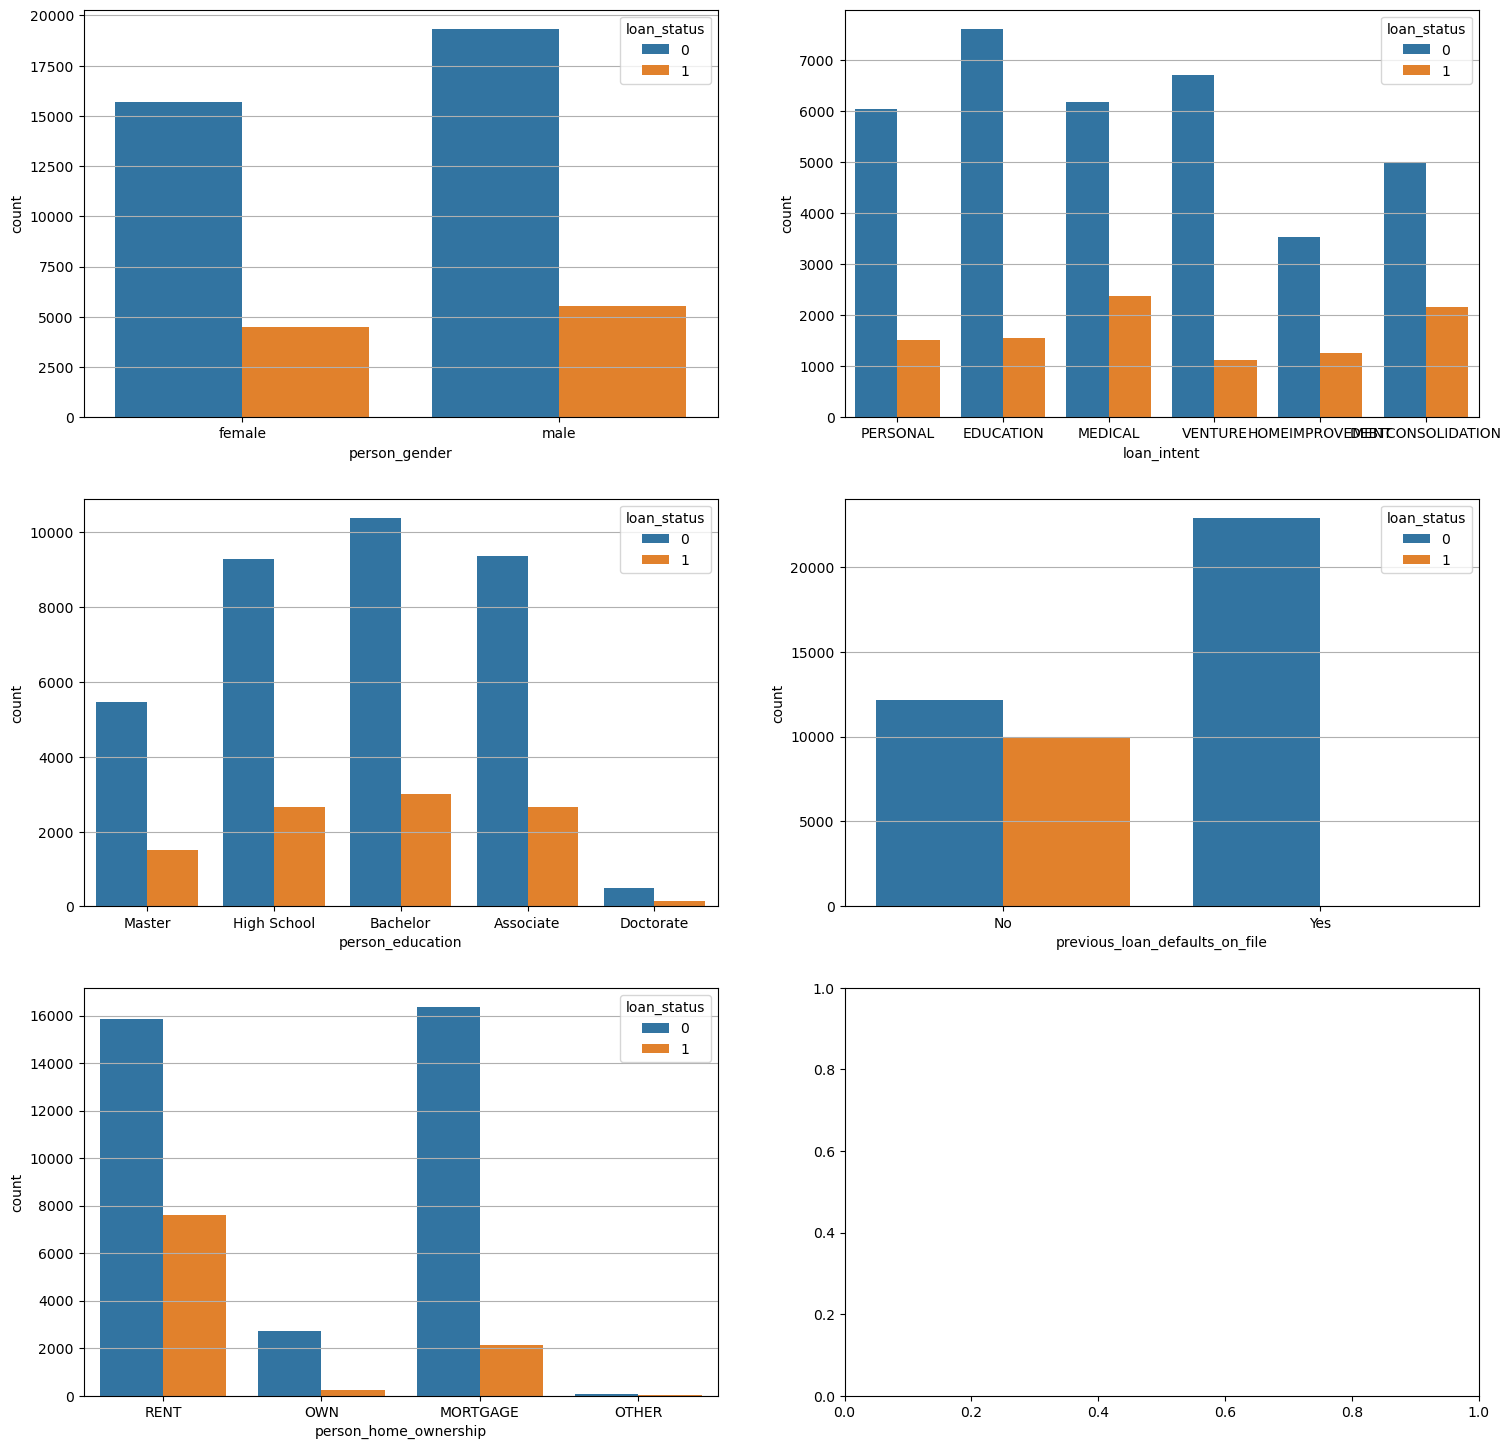

In [171]:
fig, axes = plt.subplots(figsize=(18,18), ncols=2, nrows=3)
for i,col in enumerate(cat_cols[:-1]):
    column = i // 3
    row = i % 3

    
    
    axes[row][column].grid()
    sns.countplot(data, x=col, hue="loan_status", ax=axes[row][column])

fig.savefig("CountplotWithHue.png")

## Approval Percentages

In [161]:
def find_percentage(column, approved=True):
    total = data.shape[0]
    total_value_count = data[column].value_counts()
    approved_value_count = data.loc[data['loan_status']==1,column].value_counts()
    
    labels = list(total_value_count.index)
    approve_percentage=[]
    decline_percentage=[]

    for label in labels:
        total = total_value_count[label]
        approved_count = approved_value_count.get(label, 0)

        lbl_approve_perc = (approved_count/total) * 100
        approve_percentage.append(lbl_approve_perc)
        decline_percentage.append(100-lbl_approve_perc)

    approved_series = pd.Series(approve_percentage, index=labels, name=f"Approved Perc w.r.t {column}")
    declined_series = pd.Series(decline_percentage, index=labels, name=f"Declined Perc w.r.t {column}")
    if approved:
        return approved_series
    else:
        return declined_series
        

In [162]:
education_approve_perc = find_percentage("person_education")
education_approve_perc

Bachelor       22.524069
Associate      22.031926
High School    22.310391
Master         21.762178
Doctorate      22.866345
Name: Approved Perc w.r.t person_education, dtype: float64

In [170]:
loan_intent_approve_perc = find_percetange("loan_intent", approved=False)
loan_intent_approve_perc

EDUCATION            16.956189
MEDICAL              27.819373
VENTURE              14.426397
PERSONAL             20.140360
DEBTCONSOLIDATION    30.272918
HOMEIMPROVEMENT      26.301484
Name: Declined Perc w.r.t loan_intent, dtype: float64

In [164]:
pers_home_own_approve_perc = find_percentage("person_home_ownership")
pers_home_own_approve_perc

RENT        32.397731
MORTGAGE    11.596084
OWN          7.522874
OTHER       33.333333
Name: Approved Perc w.r.t person_home_ownership, dtype: float64

In [165]:
prev_loan_onFile_approve_perc = find_percentage("previous_loan_defaults_on_file")
prev_loan_onFile_approve_perc

Yes     0.000000
No     45.163039
Name: Approved Perc w.r.t previous_loan_defaults_on_file, dtype: float64

In [157]:
gender_approve_perc = find_percentage("person_gender")
gender_approve_perc

male      77.798800
female    77.751873
Name: Approved Perc w.r.t person_gender, dtype: float64

## Correlation Heatmap

<Axes: title={'center': 'Correlation between features'}>

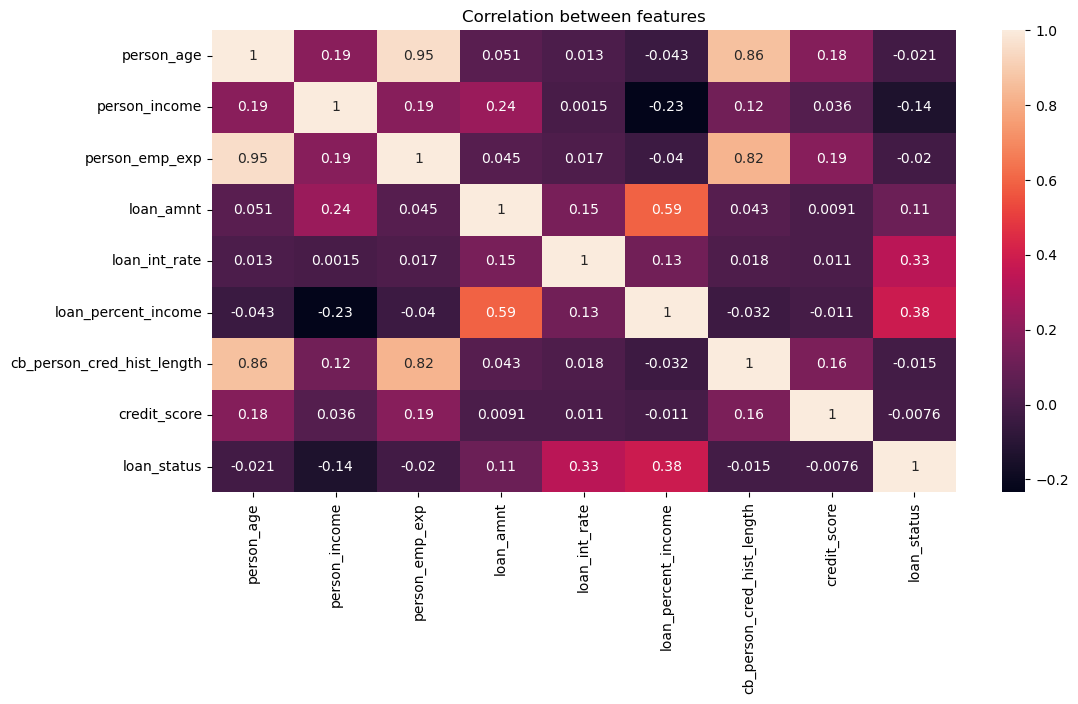

In [64]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title("Correlation between features")
sns.heatmap(data.corr(numeric_only=True), annot=True, ax=ax)